<h1> Intro to Convolutional Neural Networks (CNNs) - Keras </h1>
<br>
This excercise will present you how to interact with Keras API and build CNNs using Keras

<h3> Relevant Imports </h3>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

<h3> Data Preprocessing </h3>
A word about the data - This dataset is called MNIST. <br>
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. <br>More info can be found at the 

[MNIST homepage](http://yann.lecun.com/exdb/mnist/)

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 1s 0us/step


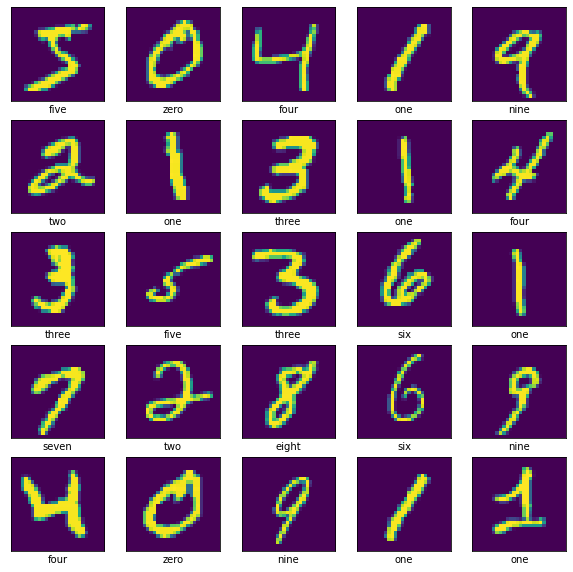

In [3]:
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']
# Let's illustrate the data and see what it actually contains

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The MNIST labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<h3> Model Creation </h3>

In [4]:
## TODO: Using the Sequential API, create the below architecture
# 28x28x1 -> Conv2d (32 filters), filter size = 3 -> ReLU -> MaxPool (2x2) -> Conv2d (64 filters) -> relu -> MaxPool (2x2) -> Conv2d (64 filters) -> relu
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

2022-07-08 14:25:19.445182: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-08 14:25:19.445207: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-08 14:25:19.445226: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daniel-lap): /proc/driver/nvidia/version does not exist
2022-07-08 14:25:19.445429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
## TODO: On top of that network, make sure to add a:
# 1. Flatten Network
# 2. Dense Network which has 64 neurons, plus a Relu activation on top of it
# 3. Dense Network with 10 neurons (which will be relevant for the 10 classes within CIFAR-10)

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

In [6]:
## TODO: Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
# Let's compile the model, don't touch the below

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2


2022-07-08 14:25:39.383700: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - ETA: 0s - loss: 0.1661 - accuracy: 0.9494

2022-07-08 14:26:04.080401: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 26s 13ms/step - loss: 0.1661 - accuracy: 0.9494 - val_loss: 0.0513 - val_accuracy: 0.9833
Epoch 2/2
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0495 - val_accuracy: 0.9844


2022-07-08 14:26:36.963491: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.0495 - accuracy: 0.9844 - 974ms/epoch - 3ms/step


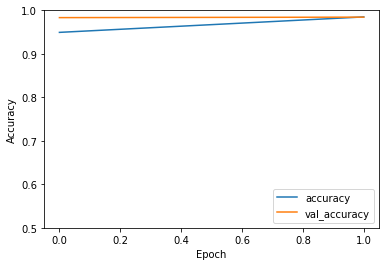

In [8]:
# Let's plot how the model trained, don't touch the below

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
# print test accuracy
print(test_acc)

0.9843999743461609
